In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = loadtxt("../../data/Illustris/Illustris_group_1.dat")
!head ../../data/Illustris/Illustris_group_1.dat
x = data[:,1]
y = data[:,2]
z = data[:,3]
Mag = data[:,8]
index = np.where(Mag<-8)
index = index[0]
x_st = x[index]
y_st = y[index]
z_st = z[index]
print "-------------------------------------------"
print "DM particles = ", len(x)
print "St particles = ", len(x_st)
print "-------------------------------------------"

#subID	 x	 y	 z	 vx	 yv	 yz	 vmax	 B_MAG
#subID	 kpc/h	 kpc/h	 kpc/h	 km/s	 km/s	 km/s	 km/s	 mags
363113 9135.142578 61494.183594 34818.050781 -75.025970 -103.862343 155.044128 183.771240 -2.164216e+01
363114 9111.817383 62023.890625 34675.218750 -41.810921 -223.350540 152.628281 203.263306 -2.065729e+01
363115 9328.059570 61322.406250 34768.777344 -113.065094 -161.372772 126.655479 103.421494 -1.920271e+01
363116 9248.898438 62146.527344 34552.589844 -173.067108 -290.183289 62.227917 81.910271 -1.775729e+01
363117 9034.386719 61466.765625 34737.417969 -3.381308 -184.282242 25.413532 70.085403 -1.733429e+01
363118 9138.362305 61942.945312 34637.523438 -45.721092 -58.925777 56.860920 71.778625 -1.659721e+01
363119 9044.320312 61451.789062 34865.535156 -21.678198 37.051926 190.498688 57.622360 -1.593198e+01
363120 8969.599609 61737.640625 34777.605469 1.009598 -213.725128 195.186966 57.876957 -1.513712e+01
-------------------------------------------
DM particles =  1056
St particles =  

1056


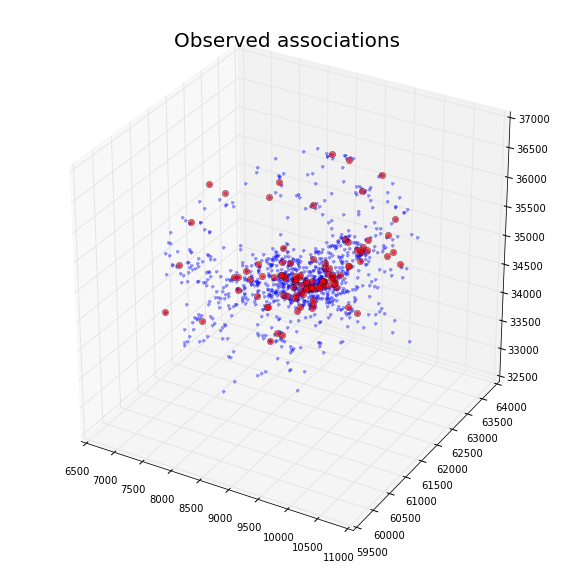

In [3]:
print len(x)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
title("Observed associations", fontsize=20)
plot(x, y, z, ls='*', marker='.', alpha=0.4)
plot(x_st, y_st, z_st, ls='*', marker='o', alpha=0.6, c='r')

In [4]:
f = open("Illustris-associtations.dat", "w")
f.write("%d\n"%1056) #points in total 
f.write("%d\n"%1056) #points in 'DM'
f.write("0\n") #gas
f.write("%d\n"%0) #stars
f.write("0.01\n") # time
f.write("0\n") # nactive
for i in range(len(x)):
    f.write(("%f \t %f \t %f  \n")%(x[i], y[i], z[i]))
f.close()

f1 = open("Illustris-associtations-stars.dat", "w")
f1.write("%d\n"%102) #points in total 
f1.write("%d\n"%102) #points in 'DM'
f1.write("0\n") #gas
f1.write("%d\n"%0) #stars
f1.write("0.01\n") # time
f1.write("0\n") # nactive
for i in range(len(x_st)):
    f1.write(("%f \t %f \t %f  \n")%(x_st[i], y_st[i], z_st[i]))
f1.close()



In [8]:
os.system(('./../../../HackFOF/src/fof -e %f -m 2 < Illustris-associtations.dat')%(724*0.7)) # check this linking length
fof_groups = loadtxt('fof.grp', skiprows=1)
N_dm  = len(list(set(fof_groups)))
print "Associations found = ", N_dm

os.system(('./../../../HackFOF/src/fof -e %f -m 2 < Illustris-associtations-stars.dat')%(724*0.7)) # check this linking length
fof_groups_stars = loadtxt('fof.grp', skiprows=1)
N_s = len(list(set(fof_groups_stars)))
print "Associations found = ", N_s

Associations found =  5
Associations found =  7


In [14]:
print len(fof_groups), len(fof_groups_stars)

1056 102


Number of members in dm groups 0 = 8
Number of members in dm groups 1 = 1032
Number of members in dm groups 2 = 4
Number of members in dm groups 3 = 10
Number of members in dm groups 4 = 2


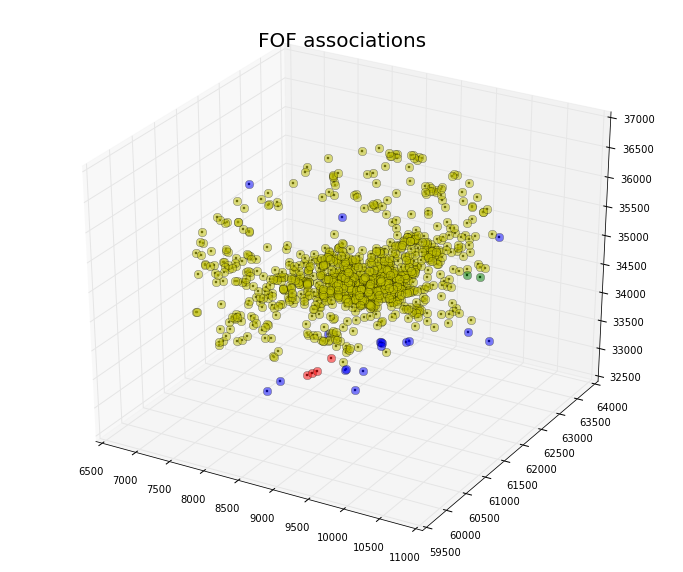

In [6]:
id_dm = fof_groups
id_s = fof_groups_stars 
c = ["r", "b", "g", "y", "k", "c", "m", "r", "b", "k", "b", "y"]
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
title("FOF associations", fontsize=20)

plot(x, y, z, ls='*', marker='.', ms=4, c='k')
#plot(x_st, y_st, z_st, ls='*', marker='.',  c='r', alpha=0.5, ms=4)
for i in range(0,N_dm):
    index = where(id_dm==i)
    index = index[0]
    x_a = x[index]
    y_a = y[index]
    z_a = z[index]
    print "Number of members in dm groups", i, "=", len(x_a)
    plot(x_a, y_a, z_a, c=c[i-2],  ls='*', marker='o', alpha=0.5, ms=8)
#for i in range(0, N_s):
#    index = where(id_s==i)
#    index = index[0]
#    x_s = x[index]
#    y_s = y[index]
#    z_s = z[index]
#    print "Number of members in stars groups", i, "=", len(x_s)
#    plot(x_s, y_s, z_s, c=c[i-2],  ls='*', marker='o') 

Number of members in stars groups 0 = 17
Number of members in stars groups 1 = 64
Number of members in stars groups 2 = 3
Number of members in stars groups 3 = 3
Number of members in stars groups 4 = 9
Number of members in stars groups 5 = 2
Number of members in stars groups 6 = 4
102


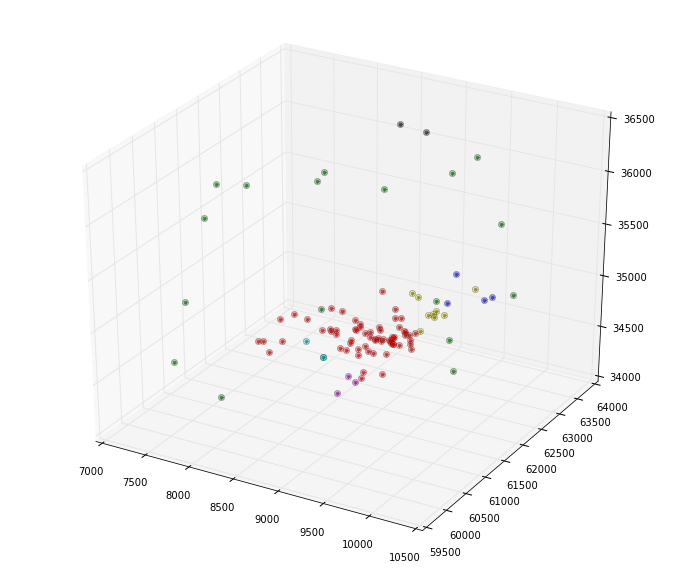

In [16]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
plot(x_st, y_st, z_st, ls='*', marker='.',  c='k', alpha=0.5, ms=6)

#for i in range(0,N_dm):
#    index = where(id_dm==i)
#    index = index[0]
#    x_a = x[index]
#    y_a = y[index]
#    z_a = z[index]
#    print "Number of members in dm groups", i, "=", len(x_a)
#    plot(x_a, y_a, z_a, c=c[i-2],  ls='*', marker='.')
for i in range(0, N_s):
    index = where(id_s==i)
    index = index[0]
    x_s = x_st[index]
    y_s = y_st[index]
    z_s = z_st[index]
    print "Number of members in stars groups", i, "=", len(y_s)
    plot(x_s, y_s, z_s,  ls='*', marker='o', ms=6, alpha=0.4)
    #ax.set_xlim3d(min(x_s), max(x_s))
    #ax.set_ylim3d(min(y_s), max(y_s))   
    #ax.set_zlim3d(min(z_s), max(z_s))  
print len(x_st)